<a href="https://colab.research.google.com/github/Madhu18S/IBM_practice/blob/main/data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import tensorflow as tf

# Style settings
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
# Load the dataset
df = pd.read_csv("healthcare_dataset.csv")

# Display first few rows
print("Sample Data:")
display(df.head())


Sample Data:


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [ ]:
# General structure
print(df.info())

# Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Basic stats
print("\nStatistical Summary:")
display(df.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
count,55500,55500.000000,55500,55500,55500,55500,55500,55500,55500,55500.000000,55500.000000,55500,55500,55500,55500
unique,49992,NaN,2,8,6,1827,40341,39876,5,NaN,NaN,3,1856,5,3
top,DAvId muNoZ,NaN,Male,A-,Arthritis,2024-03-16,Michael Smith,LLC Smith,Cigna,NaN,NaN,Elective,2020-03-15,Lipitor,Abnormal
freq,3,NaN,27774,6969,9308,50,27,44,11249,NaN,NaN,18655,53,11140,18627
mean,NaN,51.539459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25539.316097,301.134829,NaN,NaN,NaN,NaN
std,NaN,19.602454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14211.454431,115.243069,NaN,NaN,NaN,NaN
min,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2008.492140,101.000000,NaN,NaN,NaN,NaN
25%,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13241.224652,202.000000,NaN,NaN,NaN,NaN
50%,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25538.069376,302.000000,NaN,NaN,NaN,NaN
75%,NaN,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37820.508436,401.000000,NaN,NaN,NaN,NaN


In [ ]:
# Remove duplicates
df = df.drop_duplicates()

# Handle missing values correctly
for col in df.select_dtypes(include=np.number).columns:
    df[col] = df[col].fillna(df[col].median())

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Clean up text columns (use correct column names)
text_cols = ['Medical Condition', 'Insurance Provider', 'Doctor', 'Hospital']
for col in text_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.lower()

print("✅ Cleaning complete! Columns cleaned and missing values handled.")


✅ Cleaning complete! Columns cleaned and missing values handled.


In [ ]:
print("Columns in the dataset:")
print(df.columns.tolist())
if 'Name' in df.columns:
    df = df.drop(columns=['Name'])
if 'Doctor' in df.columns:
  df = df.drop(columns=['Doctor'])
if 'Hospital' in df.columns:
    df = df.drop(columns=['Hospital'])
if 'Date of Admission' in df.columns:
    df = df.drop(columns=['Date of Admission'])
for col in df.columns:
    unique_vals = df[col].nunique()
    print(f"{col}: {unique_vals} unique values")
df.describe()

import numpy as np

# Step 5.1: Detect negative billing amounts
neg_bills = df[df['Billing Amount'] < 0]
print(f"Number of negative billing records: {len(neg_bills)}")

# Step 5.2: Option 1 – Replace negatives with the median of valid bills
median_bill = df[df['Billing Amount'] > 0]['Billing Amount'].median()
df.loc[df['Billing Amount'] < 0, 'Billing Amount'] = median_bill

# Step 5.3: Ensure no negatives remain
print(f"Negative bills after cleaning: {(df['Billing Amount'] < 0).sum()}")

# Step 5.4: Optional sanity check — describe again
print(df[['Age', 'Billing Amount', 'Room Number']].describe())

# Step 6.1: Treat very low billing values as anomalies
low_bills = df[df['Billing Amount'] < 100]
print(f"Records with suspiciously low billing amounts: {len(low_bills)}")

# Replace those with the median of valid billing amounts
valid_median = df[df['Billing Amount'] >= 100]['Billing Amount'].median()
df.loc[df['Billing Amount'] < 100, 'Billing Amount'] = valid_median

# Step 6.2: Validate room numbers BEFORE conversion safely
# Try converting to numeric for this check
df['Room Number'] = pd.to_numeric(df['Room Number'], errors='coerce')

invalid_rooms = df[(df['Room Number'] < 100) | (df['Room Number'] > 500)]
print(f"Number of invalid room numbers: {len(invalid_rooms)}")

# Step 6.3: Convert Room Number back to categorical after checking
df['Room Number'] = df['Room Number'].astype(str)


# Step 6.3: Convert Room Number to categorical
df['Room Number'] = df['Room Number'].astype(str)

# Step 6.4: Recheck summary
print(df[['Age', 'Billing Amount']].describe())



Columns in the dataset:
['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider', 'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date', 'Medication', 'Test Results']
Age: 77 unique values
Gender: 2 unique values
Blood Type: 8 unique values
Medical Condition: 6 unique values
Insurance Provider: 5 unique values
Billing Amount: 49884 unique values
Room Number: 400 unique values
Admission Type: 3 unique values
Discharge Date: 1856 unique values
Medication: 5 unique values
Test Results: 3 unique values
Number of negative billing records: 0
Negative bills after cleaning: 0
                Age  Billing Amount
count  54966.000000    54966.000000
mean      51.535185    25604.851670
std       19.605661    14152.971604
min       13.000000      107.334243
25%       35.000000    13344.980662
50%       52.000000    25593.873000
75%       68.000000    37819.858159
max       89.000000    52764.276736
Records with suspiciously low billing amounts: 0
Number of invalid roo

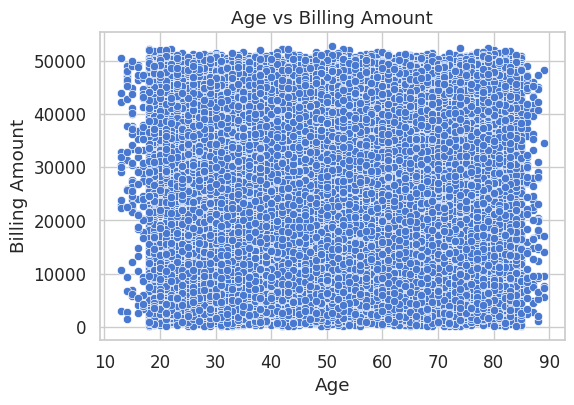

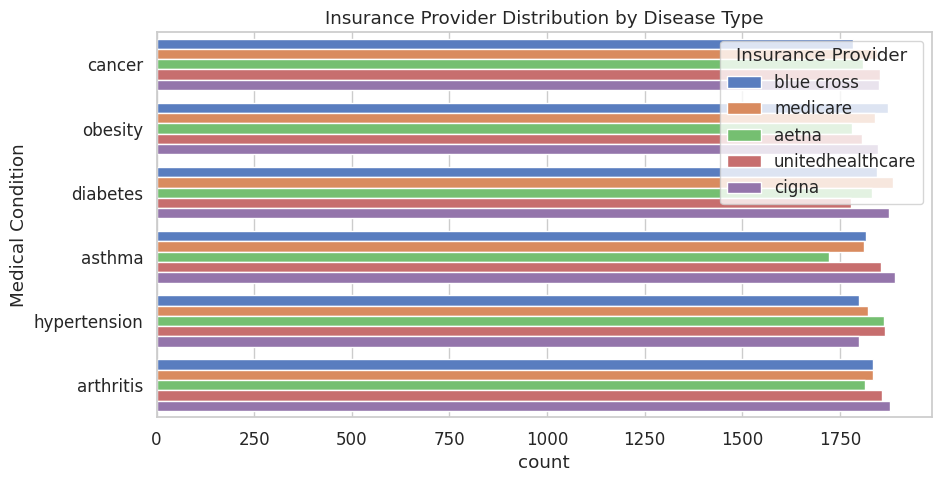

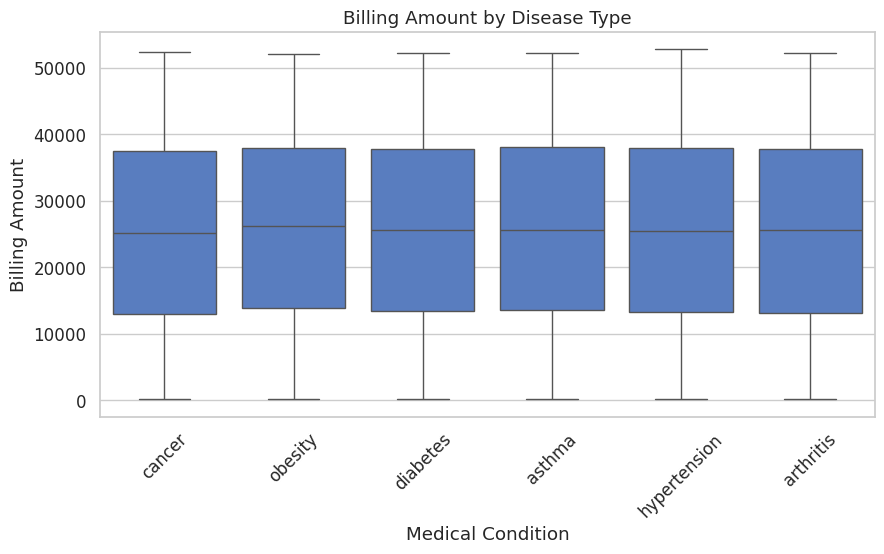

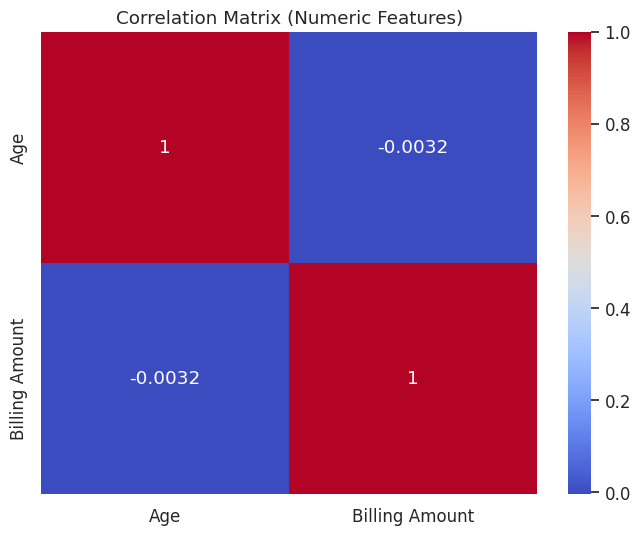

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Age', y='Billing Amount', data=df)
plt.title('Age vs Billing Amount')
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(y='Medical Condition', hue='Insurance Provider', data=df)
plt.title('Insurance Provider Distribution by Disease Type')
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x='Medical Condition', y='Billing Amount', data=df)
plt.title('Billing Amount by Disease Type')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Numeric Features)")
plt.show()


✅ Step 5 complete: Feature understanding & new columns added.


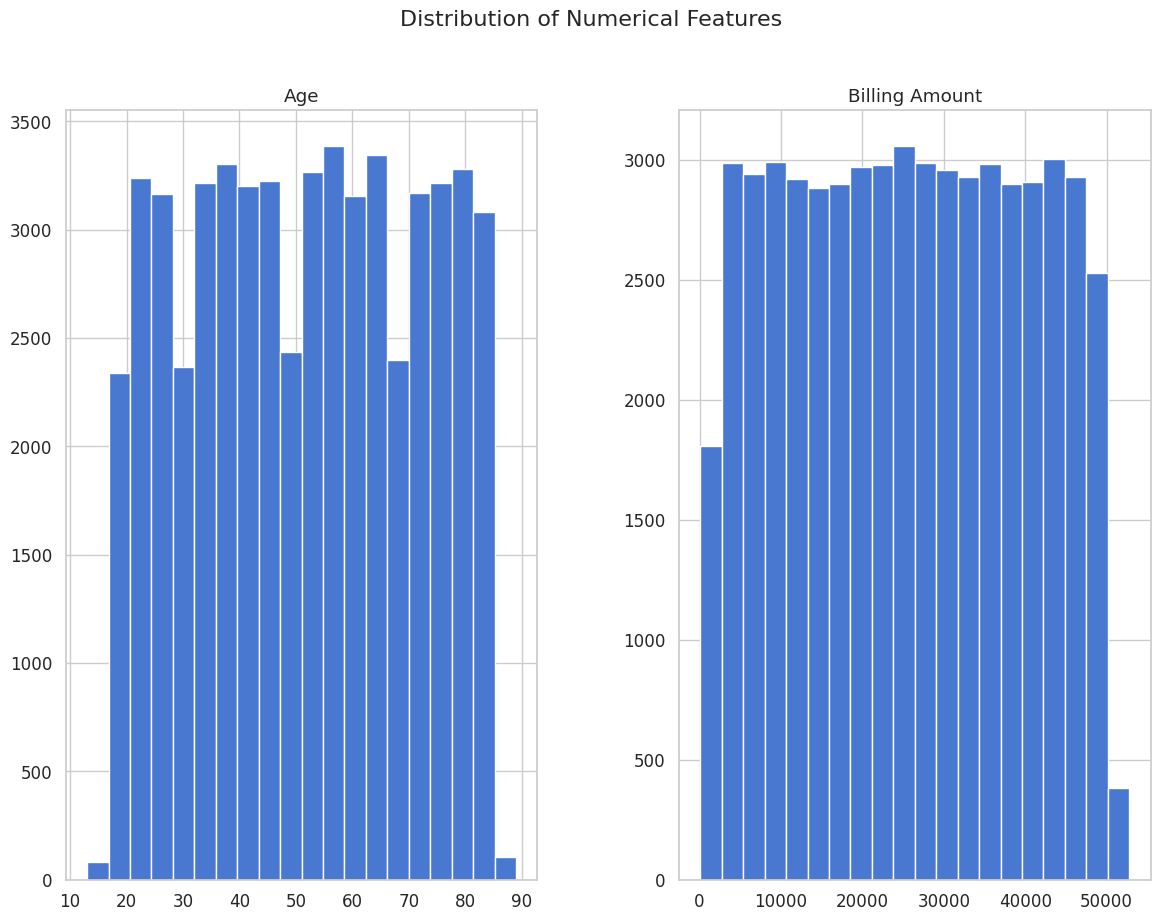

<Figure size 1000x500 with 0 Axes>

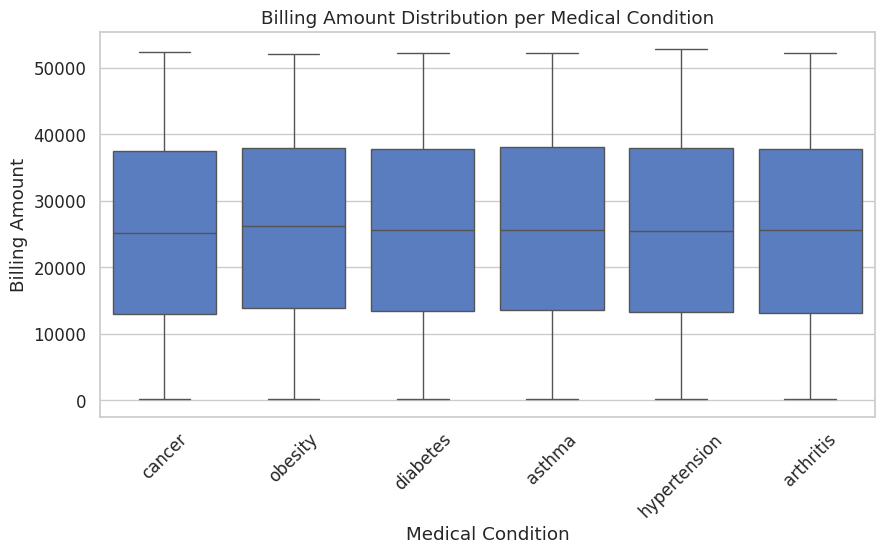

Unique Medical Conditions: ['cancer' 'obesity' 'diabetes' 'asthma' 'hypertension' 'arthritis']
Billing Amount min/max: 107.33424300639194 52764.276736469175


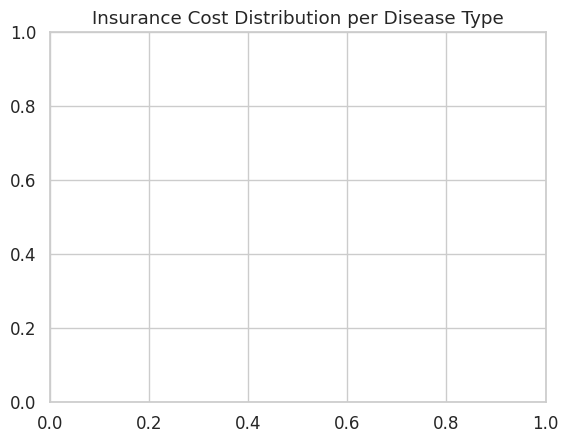

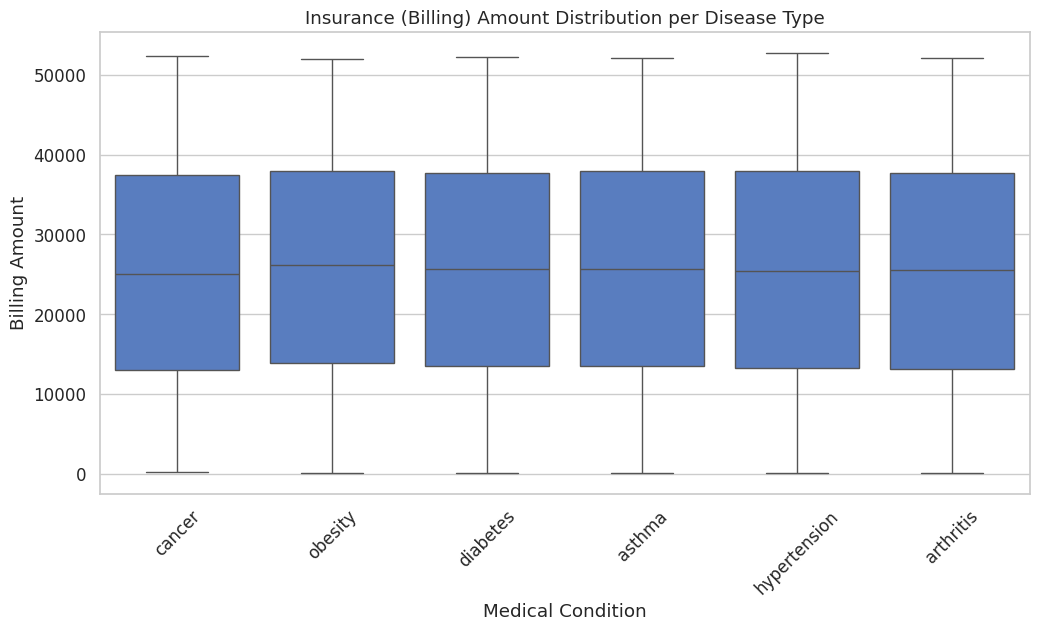

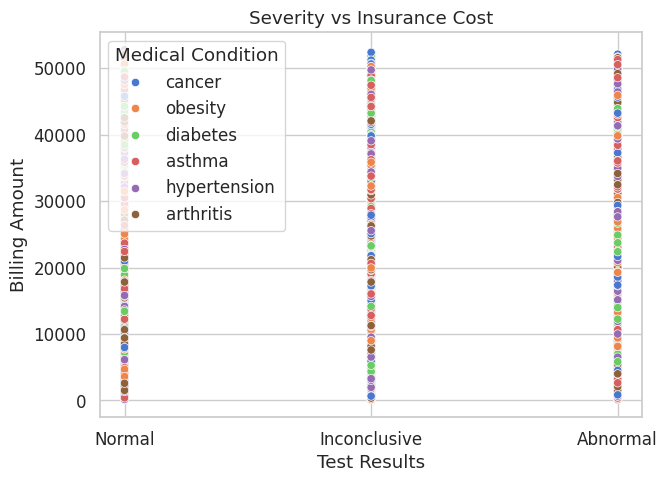

<Figure size 1000x500 with 0 Axes>

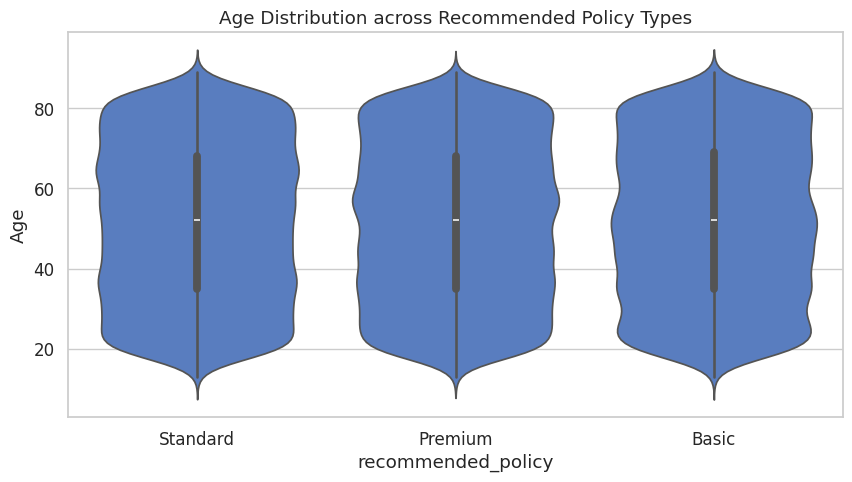

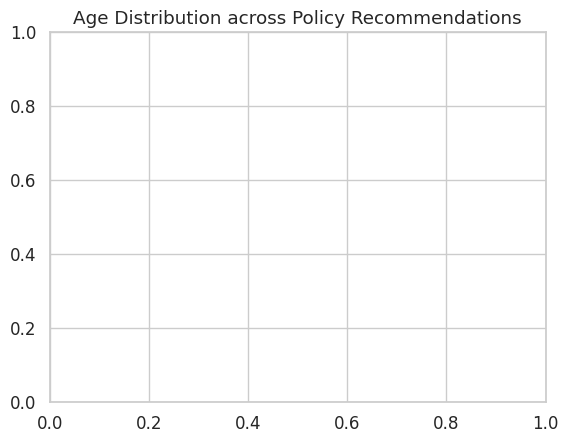

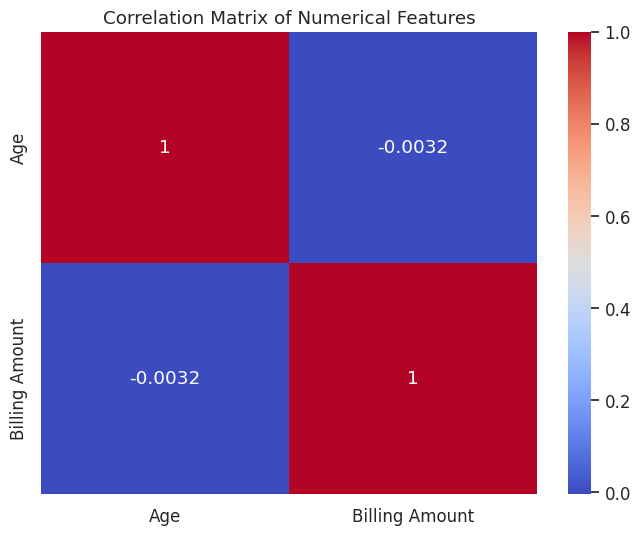

In [ ]:
df.to_csv("processed_insurance_data_step5.csv", index=False)
print("✅ Step 5 complete: Feature understanding & new columns added.")

numeric_cols = df.select_dtypes(include=np.number).columns

df[numeric_cols].hist(figsize=(14,10), bins=20)
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

plt.figure(figsize=(10,5))
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.boxplot(x='Medical Condition', y='Billing Amount', data=df)
plt.title("Billing Amount Distribution per Medical Condition")
plt.xticks(rotation=45)
plt.show()

plt.title("Insurance Cost Distribution per Disease Type")
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Check unique values
print("Unique Medical Conditions:", df['Medical Condition'].unique()[:10])
print("Billing Amount min/max:", df['Billing Amount'].min(), df['Billing Amount'].max())

# Step 2: Drop missing or zero entries
plot_df = df.dropna(subset=['Medical Condition', 'Billing Amount'])
plot_df = plot_df[plot_df['Billing Amount'] > 0]

# Step 3: Ensure correct data types
plot_df['Medical Condition'] = plot_df['Medical Condition'].astype(str)
plot_df['Billing Amount'] = plot_df['Billing Amount'].astype(float)

# Step 4: Plot
plt.figure(figsize=(12,6))
sns.boxplot(x='Medical Condition', y='Billing Amount', data=plot_df)
plt.title("Insurance (Billing) Amount Distribution per Disease Type")
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(7,5))
sns.scatterplot(x='Test Results', y='Billing Amount', hue='Medical Condition', data=df)
plt.title("Severity vs Insurance Cost")
plt.show()

plt.figure(figsize=(10,5))
# Simple demo: define recommended policy tiers
def recommend_policy(row):
    if row['Billing Amount'] < 15000:
        return 'Basic'
    elif row['Billing Amount'] < 30000:
        return 'Standard'
    else:
        return 'Premium'

df['recommended_policy'] = df.apply(recommend_policy, axis=1)

# Now plot
plt.figure(figsize=(10,5))
sns.violinplot(x='recommended_policy', y='Age', data=df)
plt.title("Age Distribution across Recommended Policy Types")
plt.show()

plt.title("Age Distribution across Policy Recommendations")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Only one numeric column to scale for now
df['Billing Amount (scaled)'] = scaler.fit_transform(df[['Billing Amount']])

df.to_csv("cleaned_insurance_patient_data.csv", index=False)
print("✅ Cleaned file saved as cleaned_insurance_patient_data.csv")


✅ Cleaned file saved as cleaned_insurance_patient_data.csv


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


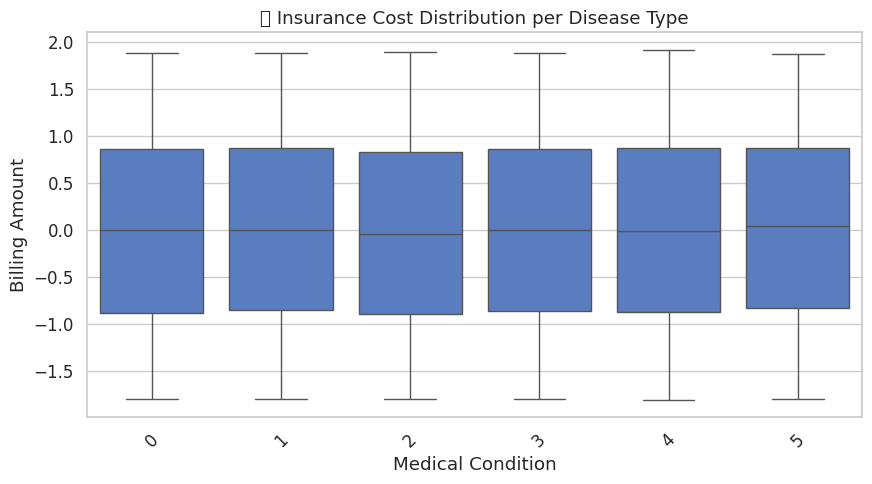

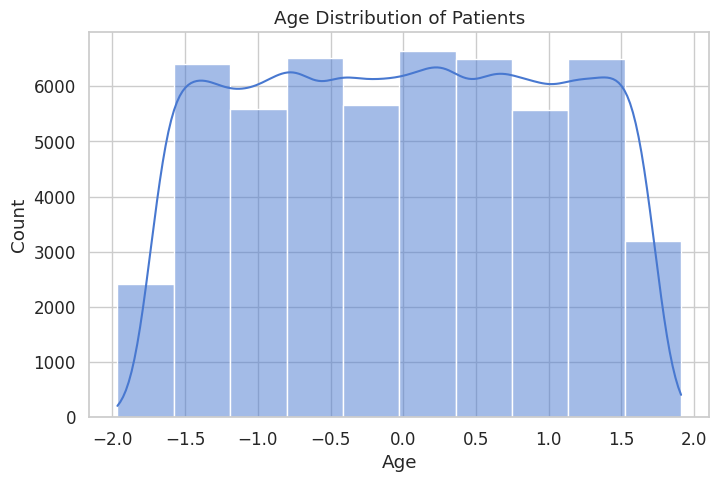

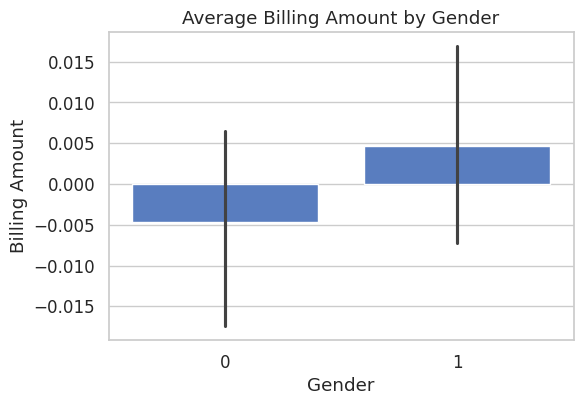

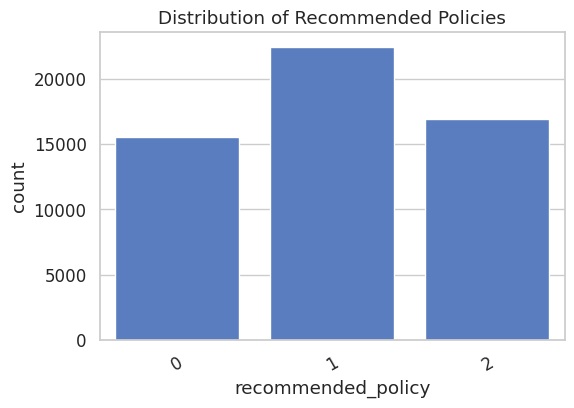

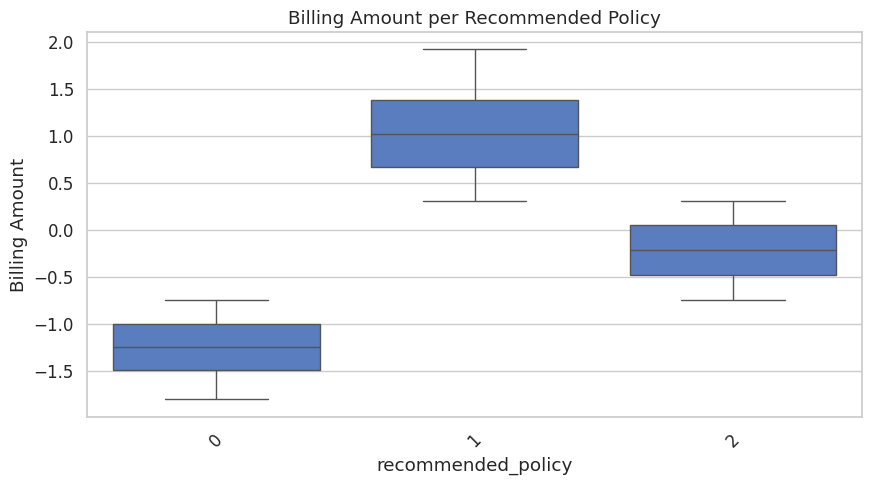

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv("cleaned_insurance_patient_data.csv")

plt.figure(figsize=(10, 5))
sns.boxplot(x='Medical Condition', y='Billing Amount', data=df)
plt.title("💰 Insurance Cost Distribution per Disease Type")
plt.xticks(rotation=45)
plt.show()

# Age distribution (if numeric)
if pd.api.types.is_numeric_dtype(df['Age']):
    plt.figure(figsize=(8, 5))
    sns.histplot(df['Age'], bins=10, kde=True)
    plt.title("Age Distribution of Patients")
    plt.show()

# Gender vs Billing
plt.figure(figsize=(6, 4))
sns.barplot(x='Gender', y='Billing Amount', data=df, estimator='mean')
plt.title("Average Billing Amount by Gender")
plt.show()

# Policy recommendation distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='recommended_policy', data=df)
plt.title("Distribution of Recommended Policies")
plt.xticks(rotation=30)
plt.show()

# Policy vs Billing (to see if recommendation aligns with higher cost)
plt.figure(figsize=(10, 5))
sns.boxplot(x='recommended_policy', y='Billing Amount', data=df)
plt.title("Billing Amount per Recommended Policy")
plt.xticks(rotation=45)
plt.show()


In [ ]:
import numpy as np

# Add synthetic numeric columns for demonstration
np.random.seed(42)

df['BMI'] = np.random.normal(25, 4, size=len(df)).clip(15, 40)  # realistic BMI range
df['BloodPressure'] = np.random.normal(120, 15, size=len(df)).clip(80, 180)
df['Cholesterol'] = np.random.normal(200, 30, size=len(df)).clip(120, 300)
df['ClaimAmount'] = df['Billing Amount'] * np.random.uniform(0.8, 1.2, len(df))
df['AnnualIncome'] = np.random.normal(600000, 200000, size=len(df)).clip(200000, 2000000)

from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables
label_cols = ['Gender', 'Blood Type', 'Medical Condition',
              'Insurance Provider', 'Admission Type', 'Medication']
for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Normalize numeric columns
scaler = StandardScaler()
numeric_cols = ['Age', 'BMI', 'BloodPressure', 'Cholesterol', 'ClaimAmount', 'AnnualIncome']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df['Health_Risk_Index'] = (df['Age'] * df['Cholesterol'] * df['BloodPressure']) / df['BMI']
df['Claim_to_Income_Ratio'] = df['ClaimAmount'] / df['AnnualIncome']

df.to_csv("clean_health_insurance.csv", index=False)
print("✅ Clean dataset saved as clean_health_insurance.csv")


✅ Clean dataset saved as clean_health_insurance.csv
